In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv("/Users/prathammehta/Cybercops/Global_Cybersecurity_Threats_2015-2024.csv")

# Cleaning and Study of Data

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [77]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [78]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [79]:
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [80]:
df.duplicated().sum()

np.int64(0)

# Global Overview Visualisation

In [81]:
plt.style.use('ggplot')
sns.set_palette("husl")

/var/folders/t4/3jh8m4ld7hn4mwwbvrp2vgpr0000gn/T/ipykernel_2028/1079528536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "Year", palette = "viridis")


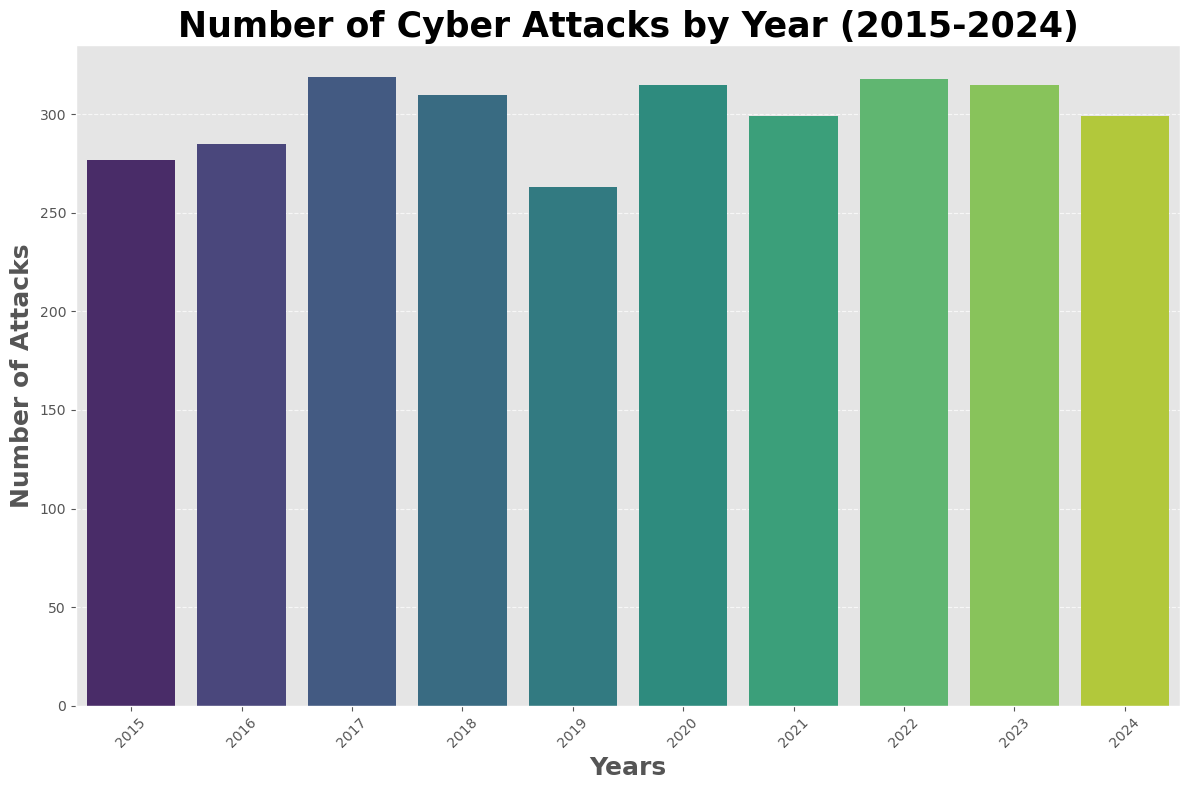

In [82]:
plt.figure(figsize = (12,8))
sns.countplot(data = df, x = "Year", palette = "viridis")
plt.title("Number of Cyber Attacks by Year (2015-2024)", fontsize = 25, fontweight = "bold")
plt.xlabel("Years", fontsize = 18, fontweight = "bold")
plt.ylabel("Number of Attacks", fontsize = 18, fontweight = "bold")
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = "dashed", alpha = 0.7)
plt.tight_layout()

### Total financial loss by year

In [83]:
print("Total financial loss by year:")
print(df.groupby('Year')['Financial Loss (in Million $)'].sum().sort_values(ascending=False).head())

Total financial loss by year:
Year
2017    16261.68
2023    15958.08
2021    15873.41
2022    15870.86
2020    15767.95
Name: Financial Loss (in Million $), dtype: float64


### Most common attack type

In [84]:
print("Most common attack type:", df['Attack Type'].value_counts().idxmax())

Most common attack type: DDoS


### Country with the most cyber attacks

In [85]:
print("Country with most cyber attacks:", df['Country'].value_counts().idxmax())

Country with most cyber attacks: UK


### Industry with the highest financial loss

In [86]:
industry_loss = df.groupby('Target Industry')['Financial Loss (in Million $)'].sum()
print("Top industry by financial loss:", industry_loss.idxmax())

Top industry by financial loss: IT


### Origin with the highest financial loss

In [87]:
origin_loss = df.groupby('Attack Source')['Financial Loss (in Million $)'].sum()
print("Attack origin with most loss:", origin_loss.idxmax())

Attack origin with most loss: Nation-state


### Attack type with highest average time to resolve

In [88]:
resolve_time = df.groupby('Attack Type')['Incident Resolution Time (in Hours)'].mean()
print("Attack type with highest avg. time to resolve:", resolve_time.idxmax())

Attack type with highest avg. time to resolve: Malware


### Total number of affected users

In [89]:
print("Total number of affected users:", df['Number of Affected Users'].sum())

Total number of affected users: 1514052409


### Max users affected in a single incident

In [90]:
print("Max users affected in a single incident:", df['Number of Affected Users'].max())

Max users affected in a single incident: 999635


### Year with most affected users

In [91]:
year_users = df.groupby('Year')['Number of Affected Users'].sum()
print("Year with most affected users:", year_users.idxmax())

Year with most affected users: 2022


### Most common vulnerability type

In [92]:
print("Most common vulnerability:", df['Security Vulnerability Type'].value_counts().idxmax())

Most common vulnerability: Zero-day


# Country Analysis

### Total financial loss by country (Top 8)

/var/folders/t4/3jh8m4ld7hn4mwwbvrp2vgpr0000gn/T/ipykernel_2028/699326268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_loss_by_country.values, y=total_loss_by_country.index, palette="Reds_r")


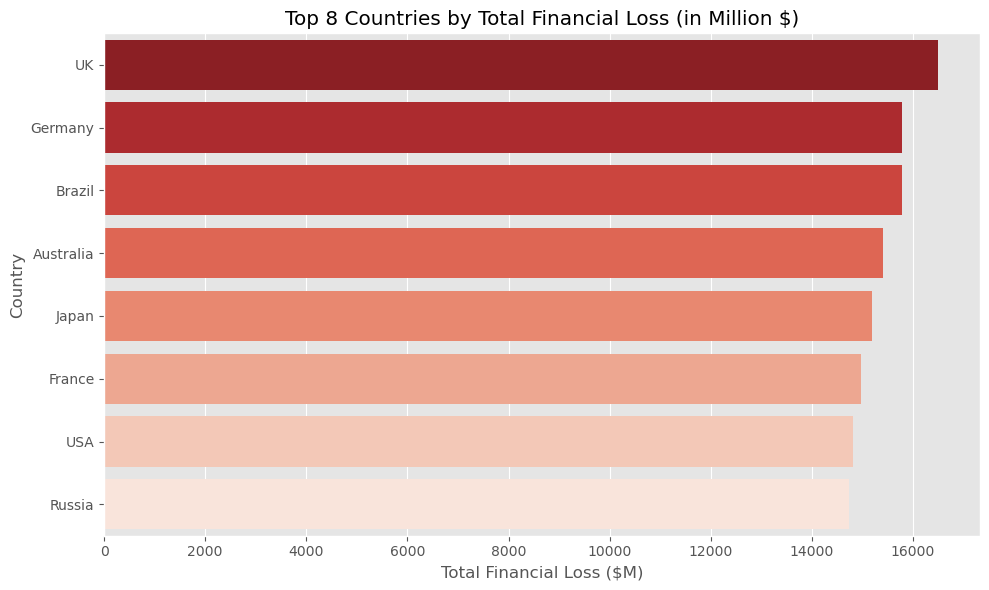

In [93]:
total_loss_by_country = df.groupby("Country")["Financial Loss (in Million $)"].sum().sort_values(ascending=False).head(8)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_loss_by_country.values, y=total_loss_by_country.index, palette="Reds_r")
plt.title("Top 8 Countries by Total Financial Loss (in Million $)")
plt.xlabel("Total Financial Loss ($M)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Average financial loss per incident by country

In [94]:
avg_loss_by_country = df.groupby("Country")["Financial Loss (in Million $)"].mean().sort_values(ascending=False)
print("Average loss per incident by country (Top 8):")
print(avg_loss_by_country.head(8))

Average loss per incident by country (Top 8):
Country
Germany      54.272302
Australia    51.861953
USA          51.610174
UK           51.411184
Brazil       50.911677
Russia       49.948237
Japan        49.827344
France       49.089443
Name: Financial Loss (in Million $), dtype: float64


### Total affected users by country

In [95]:
total_affected_by_country = df.groupby("Country")["Number of Affected Users"].sum().sort_values(ascending=False)
print("\nTotal affected users by country (Top 8):")
print(total_affected_by_country.head(8))


Total affected users by country (Top 8):
Country
Brazil       168806980
UK           157464983
France       156229142
Russia       152191835
Australia    150011830
India        149178659
Japan        148711814
Germany      147675358
Name: Number of Affected Users, dtype: int64


### Average affected users per incident by country

In [96]:
avg_affected_by_country = df.groupby("Country")["Number of Affected Users"].mean().sort_values(ascending=False)
print("\nAverage affected users per incident by country (Top 8):")
print(avg_affected_by_country.head(8))


Average affected users per incident by country (Top 8):
Country
Brazil       544538.645161
Russia       515904.525424
France       512226.695082
Germany      507475.457045
Australia    505090.336700
USA          502442.055749
China        496729.316726
UK           490545.118380
Name: Number of Affected Users, dtype: float64


### Most common attack type by country

In [97]:
most_common_attack_by_country = df.groupby("Country")["Attack Type"].agg(lambda x: x.mode()[0])
print("\nMost common attack type by country (sample of 8):")
print(most_common_attack_by_country.head(8))


Most common attack type by country (sample of 8):
Country
Australia             DDoS
Brazil                DDoS
China           Ransomware
France            Phishing
Germany      SQL Injection
India           Ransomware
Japan             Phishing
Russia          Ransomware
Name: Attack Type, dtype: object


### Most targeted industry by country

In [98]:
most_targeted_industry_by_country = df.groupby("Country")["Target Industry"].agg(lambda x: x.mode()[0])
print("\nMost targeted industry by country (sample of 8):")
print(most_targeted_industry_by_country.head(8))


Most targeted industry by country (sample of 8):
Country
Australia            Healthcare
Brazil               Healthcare
China                 Education
France               Healthcare
Germany                 Banking
India                        IT
Japan                 Education
Russia       Telecommunications
Name: Target Industry, dtype: object


### Most frequent vulnerability by country

In [99]:
most_frequent_vuln_by_country = df.groupby("Country")["Security Vulnerability Type"].agg(lambda x: x.mode()[0])
print("\nMost frequent vulnerability type by country (sample of 8):")
print(most_frequent_vuln_by_country.head(8))


Most frequent vulnerability type by country (sample of 8):
Country
Australia              Zero-day
Brazil                 Zero-day
China        Social Engineering
France                 Zero-day
Germany      Unpatched Software
India        Unpatched Software
Japan                  Zero-day
Russia       Unpatched Software
Name: Security Vulnerability Type, dtype: object


### Average resolution time by country

In [100]:
avg_resolution_by_country = df.groupby("Country")["Incident Resolution Time (in Hours)"].mean().sort_values(ascending=False)
print("\nAverage incident resolution time by country (Top 8):")
print(avg_resolution_by_country.head(8))


Average incident resolution time by country (Top 8):
Country
Brazil       37.761290
China        37.398577
Japan        37.098361
UK           36.925234
Australia    36.481481
France       36.216393
Germany      36.017182
India        35.931818
Name: Incident Resolution Time (in Hours), dtype: float64


# Year Based Analysis

### Total Financial Loss by Year 

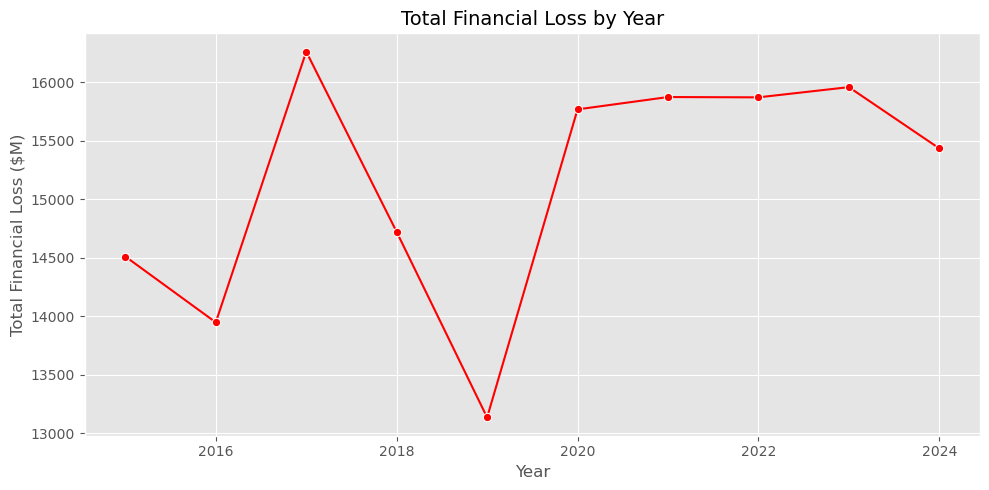

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by year and summing financial losses
total_loss_by_year = df.groupby("Year")["Financial Loss (in Million $)"].sum()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x=total_loss_by_year.index, y=total_loss_by_year.values, marker="o", color="red")
plt.title("Total Financial Loss by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Financial Loss ($M)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### Average Financial Loss per Incident by Year

In [102]:
avg_loss_by_year = df.groupby("Year")["Financial Loss (in Million $)"].mean().sort_values(ascending=False)
print(avg_loss_by_year)


Year
2021    53.088328
2015    52.383430
2024    51.619699
2017    50.977053
2023    50.660571
2020    50.056984
2019    49.941787
2022    49.908365
2016    48.937754
2018    47.485419
Name: Financial Loss (in Million $), dtype: float64


### Total Affected Users by Year

In [103]:
total_affected_by_year = df.groupby("Year")["Number of Affected Users"].sum().sort_values(ascending=False)
print(total_affected_by_year)


Year
2022    163263160
2017    161807880
2020    159036761
2021    155241999
2023    154305656
2024    153081317
2018    151774954
2016    144034584
2015    141293170
2019    130212928
Name: Number of Affected Users, dtype: int64


### Average Affected Users per Incident by Year

In [104]:
avg_affected_by_year = df.groupby("Year")["Number of Affected Users"].mean().sort_values(ascending=False)
print(avg_affected_by_year)

Year
2021    519204.010033
2022    513406.163522
2024    511977.648829
2015    510083.646209
2017    507234.733542
2016    505384.505263
2020    504878.606349
2019    495106.190114
2023    489859.225397
2018    489596.625806
Name: Number of Affected Users, dtype: float64


### Most Common Attack Type by Year

In [105]:
most_common_attack_by_year = df.groupby("Year")["Attack Type"].agg(lambda x: x.mode()[0])
print(most_common_attack_by_year)


Year
2015          Malware
2016         Phishing
2017         Phishing
2018             DDoS
2019             DDoS
2020         Phishing
2021    SQL Injection
2022          Malware
2023    SQL Injection
2024         Phishing
Name: Attack Type, dtype: object


### Most Targeted Industry by Year

In [106]:
most_targeted_industry_by_year = df.groupby("Year")["Target Industry"].agg(lambda x: x.mode()[0])
print(most_targeted_industry_by_year)


Year
2015            IT
2016            IT
2017    Healthcare
2018     Education
2019       Banking
2020       Banking
2021       Banking
2022            IT
2023            IT
2024    Government
Name: Target Industry, dtype: object


### Most Frequent Vulnerability Type by Year

In [107]:
most_common_vuln_by_year = df.groupby("Year")["Security Vulnerability Type"].agg(lambda x: x.mode()[0])
print(most_common_vuln_by_year)


Year
2015              Zero-day
2016    Social Engineering
2017              Zero-day
2018        Weak Passwords
2019              Zero-day
2020              Zero-day
2021    Social Engineering
2022              Zero-day
2023    Unpatched Software
2024    Social Engineering
Name: Security Vulnerability Type, dtype: object


### Average Incident Resolution Time by Year

In [108]:
avg_resolution_by_year = df.groupby("Year")["Incident Resolution Time (in Hours)"].mean().sort_index()
print(avg_resolution_by_year)


Year
2015    38.429603
2016    35.922807
2017    35.388715
2018    36.980645
2019    35.307985
2020    36.444444
2021    36.167224
2022    37.204403
2023    36.946032
2024    35.929766
Name: Incident Resolution Time (in Hours), dtype: float64


# Domain Type Analysis

### Total financial loss by domain

In [109]:
total_loss_by_domain = df.groupby("Target Industry")["Financial Loss (in Million $)"].sum().sort_values(ascending=False)
print("Total Financial Loss by Domain:\n", total_loss_by_domain)

Total Financial Loss by Domain:
 Target Industry
IT                    24809.83
Banking               22772.39
Government            21205.33
Retail                21119.55
Healthcare            21041.29
Telecommunications    20459.09
Education             20071.43
Name: Financial Loss (in Million $), dtype: float64


### Graph for the same

/var/folders/t4/3jh8m4ld7hn4mwwbvrp2vgpr0000gn/T/ipykernel_2028/2872237339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_loss_by_domain.values, y=total_loss_by_domain.index, palette="Reds_r")


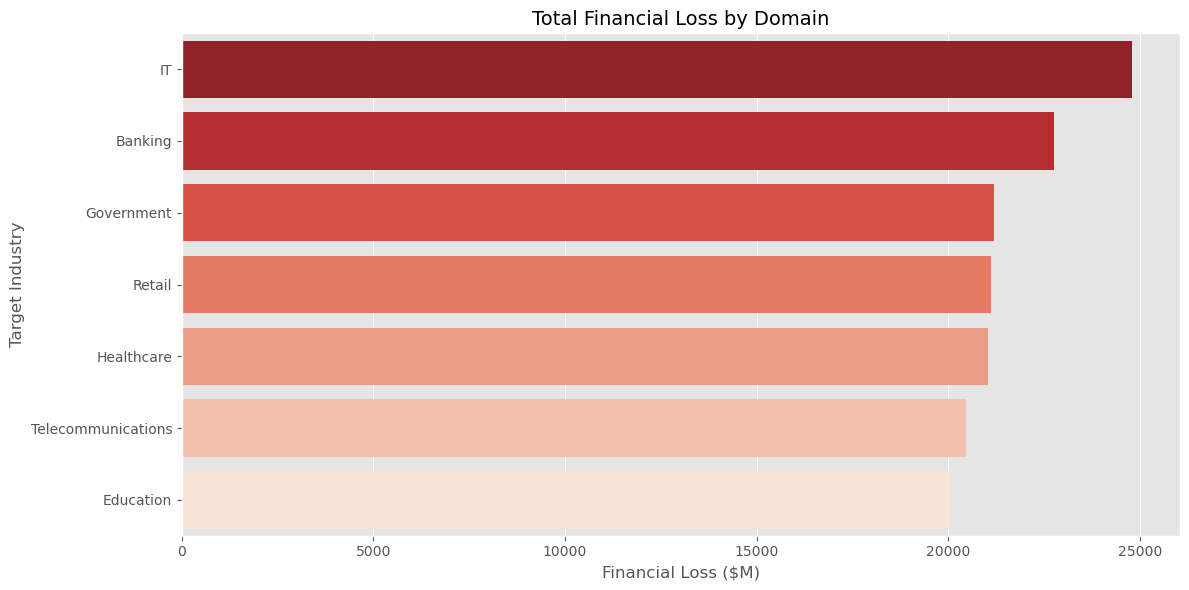

In [110]:
plt.figure(figsize=(12, 6))
sns.barplot(x=total_loss_by_domain.values, y=total_loss_by_domain.index, palette="Reds_r")
plt.title("Total Financial Loss by Domain", fontsize=14)
plt.xlabel("Financial Loss ($M)", fontsize=12)
plt.ylabel("Target Industry", fontsize=12)
plt.tight_layout()
plt.show()

### Average financial loss per incident by domain

In [111]:
avg_loss_by_domain = df.groupby("Target Industry")["Financial Loss (in Million $)"].mean().sort_values(ascending=False)
print("Average Financial Loss per Incident:\n", avg_loss_by_domain)

Average Financial Loss per Incident:
 Target Industry
Government            52.618685
IT                    51.903410
Banking               51.173910
Telecommunications    50.766973
Retail                49.928014
Healthcare            49.047296
Education             47.903174
Name: Financial Loss (in Million $), dtype: float64


### Total affected users by domain

In [112]:
total_affected_by_domain = df.groupby("Target Industry")["Number of Affected Users"].sum().sort_values(ascending=False)
print("Total Affected Users by Domain:\n", total_affected_by_domain)

Total Affected Users by Domain:
 Target Industry
IT                    250094829
Banking               225098406
Healthcare            216271916
Education             215004732
Retail                206776386
Government            201239030
Telecommunications    199567110
Name: Number of Affected Users, dtype: int64


###  Average affected users per incident by domain

In [113]:
avg_affected_by_domain = df.groupby("Target Industry")["Number of Affected Users"].mean().sort_values(ascending=False)
print("Average Affected Users per Incident:\n", avg_affected_by_domain)

Average Affected Users per Incident:
 Target Industry
IT                    523210.939331
Education             513137.785203
Banking               505839.114607
Healthcare            504130.340326
Government            499352.431762
Telecommunications    495203.746898
Retail                488833.063830
Name: Number of Affected Users, dtype: float64


### Most common attack type per domain

In [114]:
most_common_attack_by_domain = df.groupby("Target Industry")["Attack Type"].agg(lambda x: x.mode()[0])
print("Most Common Attack Type per Domain:\n", most_common_attack_by_domain)

Most Common Attack Type per Domain:
 Target Industry
Banking                    Phishing
Education                      DDoS
Government            SQL Injection
Healthcare                  Malware
IT                             DDoS
Retail                     Phishing
Telecommunications             DDoS
Name: Attack Type, dtype: object


### Most common vulnerability type per domain

In [115]:
most_common_vuln_by_domain = df.groupby("Target Industry")["Security Vulnerability Type"].agg(lambda x: x.mode()[0])
print("Most Common Vulnerability Type per Domain:\n", most_common_vuln_by_domain)

Most Common Vulnerability Type per Domain:
 Target Industry
Banking               Social Engineering
Education             Social Engineering
Government                      Zero-day
Healthcare                Weak Passwords
IT                              Zero-day
Retail                          Zero-day
Telecommunications    Unpatched Software
Name: Security Vulnerability Type, dtype: object


###  Average incident resolution time per domain

In [116]:
avg_resolution_by_domain = df.groupby("Target Industry")["Incident Resolution Time (in Hours)"].mean().sort_values(ascending=False)
print("Average Incident Resolution Time per Domain:\n", avg_resolution_by_domain)

Average Incident Resolution Time per Domain:
 Target Industry
Government            37.593052
Retail                37.219858
Telecommunications    37.062035
IT                    36.169456
Education             35.906921
Healthcare            35.806527
Banking               35.737079
Name: Incident Resolution Time (in Hours), dtype: float64


# Attack Type Analysis

### Yearly Financial Loss by Attack Type

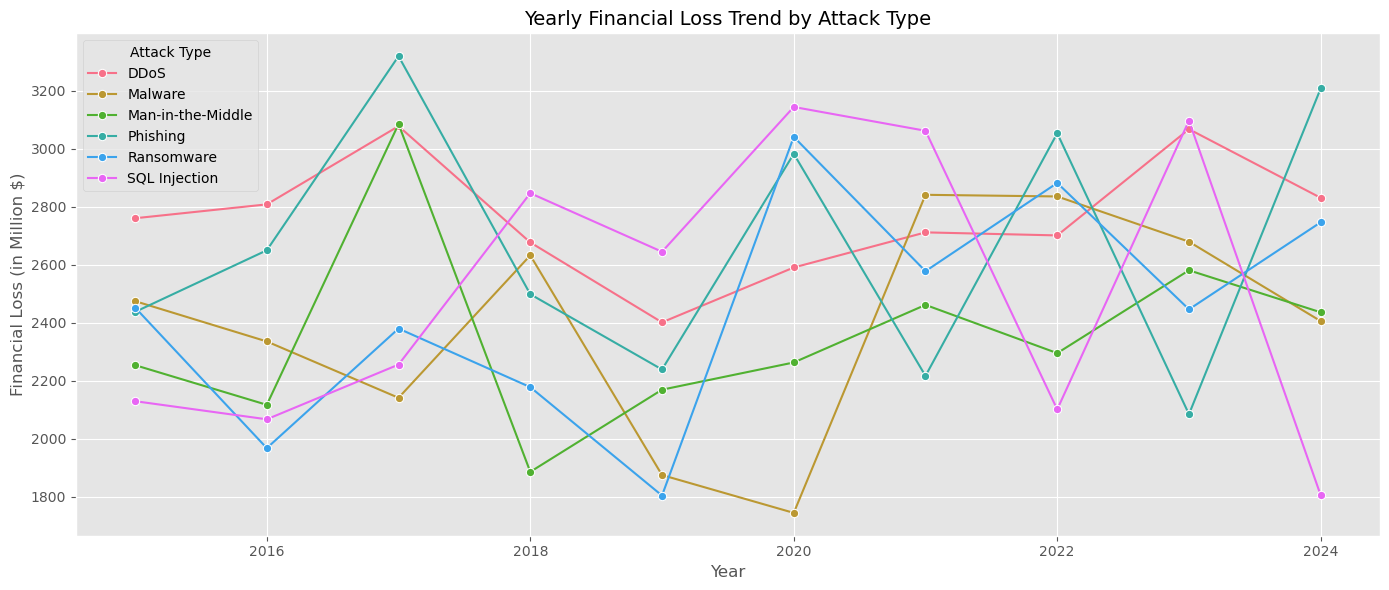

In [117]:
plt.figure(figsize=(14, 6))
loss_trend = df.groupby(["Year", "Attack Type"])["Financial Loss (in Million $)"].sum().reset_index()
sns.lineplot(data=loss_trend, x="Year", y="Financial Loss (in Million $)", hue="Attack Type", marker="o")
plt.title("Yearly Financial Loss Trend by Attack Type", fontsize=14)
plt.tight_layout()
plt.show()

### Total financial loss by attack type

In [118]:
total_loss = df.groupby("Attack Type")["Financial Loss (in Million $)"].sum().sort_values(ascending=False)
print("1. Total Financial Loss by Attack Type:\n", total_loss)

1. Total Financial Loss by Attack Type:
 Attack Type
DDoS                 27630.92
Phishing             26693.29
SQL Injection        25156.56
Ransomware           24479.32
Malware              23967.95
Man-in-the-Middle    23550.87
Name: Financial Loss (in Million $), dtype: float64


### Average financial loss per incident by attack type

In [119]:
avg_loss = df.groupby("Attack Type")["Financial Loss (in Million $)"].mean().sort_values(ascending=False)
print("\n2. Avg Financial Loss per Incident:\n", avg_loss)


2. Avg Financial Loss per Incident:
 Attack Type
DDoS                 52.035631
Man-in-the-Middle    51.309085
Phishing             50.459905
SQL Injection        50.013042
Ransomware           49.653793
Malware              49.418454
Name: Financial Loss (in Million $), dtype: float64


### Median affected users (resistant to extreme values)

In [120]:
median_users = df.groupby("Attack Type")["Number of Affected Users"].median().sort_values(ascending=False)
print("\n3. Median Affected Users per Attack Type:\n", median_users)


3. Median Affected Users per Attack Type:
 Attack Type
Man-in-the-Middle    529593.0
SQL Injection        520308.0
Ransomware           504165.0
Malware              500655.0
DDoS                 491791.0
Phishing             471550.0
Name: Number of Affected Users, dtype: float64


### Loss per user (ratio metric)

In [121]:
df["Loss per User"] = df["Financial Loss (in Million $)"] / df["Number of Affected Users"]
loss_per_user = df.groupby("Attack Type")["Loss per User"].mean().sort_values(ascending=False)
print("\n4. Avg Loss per Affected User:\n", loss_per_user)



4. Avg Loss per Affected User:
 Attack Type
Malware              0.000806
Man-in-the-Middle    0.000608
SQL Injection        0.000555
DDoS                 0.000522
Phishing             0.000320
Ransomware           0.000304
Name: Loss per User, dtype: float64


### Resolution Efficiency = Loss / Resolution Time

In [122]:
df["Resolution Efficiency"] = df["Financial Loss (in Million $)"] / df["Incident Resolution Time (in Hours)"]
efficiency = df.groupby("Attack Type")["Resolution Efficiency"].mean().sort_values(ascending=False)
print("\n5. Avg Resolution Efficiency (Loss per Hour):\n", efficiency)


5. Avg Resolution Efficiency (Loss per Hour):
 Attack Type
Man-in-the-Middle    3.541138
Phishing             3.450288
DDoS                 3.415020
Ransomware           3.055483
SQL Injection        3.017492
Malware              2.777822
Name: Resolution Efficiency, dtype: float64


### Top contributing year for each attack type (when that type caused the most total loss)

In [123]:
max_loss_year = df.groupby(["Attack Type", "Year"])["Financial Loss (in Million $)"].sum().reset_index()
top_year = max_loss_year.loc[max_loss_year.groupby("Attack Type")["Financial Loss (in Million $)"].idxmax()]
print("\n7. Top Year for Each Attack Type (Max Loss):\n", top_year)


7. Top Year for Each Attack Type (Max Loss):
           Attack Type  Year  Financial Loss (in Million $)
2                DDoS  2017                        3078.45
16            Malware  2021                        2841.65
22  Man-in-the-Middle  2017                        3085.62
32           Phishing  2017                        3319.86
45         Ransomware  2020                        3041.55
55      SQL Injection  2020                        3144.69


### Ratio of high-damage attacks (those above attack type average)

In [124]:
df["Above Avg Loss"] = df.groupby("Attack Type")["Financial Loss (in Million $)"].transform(lambda x: x > x.mean())
above_avg_ratio = df.groupby("Attack Type")["Above Avg Loss"].mean().sort_values(ascending=False) * 100
print("\n8. % of High Damage Attacks in Each Type:\n", above_avg_ratio)


8. % of High Damage Attacks in Each Type:
 Attack Type
DDoS                 51.412429
Malware              50.927835
SQL Injection        50.894632
Man-in-the-Middle    50.544662
Ransomware           49.898580
Phishing             48.393195
Name: Above Avg Loss, dtype: float64


/var/folders/t4/3jh8m4ld7hn4mwwbvrp2vgpr0000gn/T/ipykernel_2028/2808755988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_loss.values, y=total_loss.index, palette="viridis")


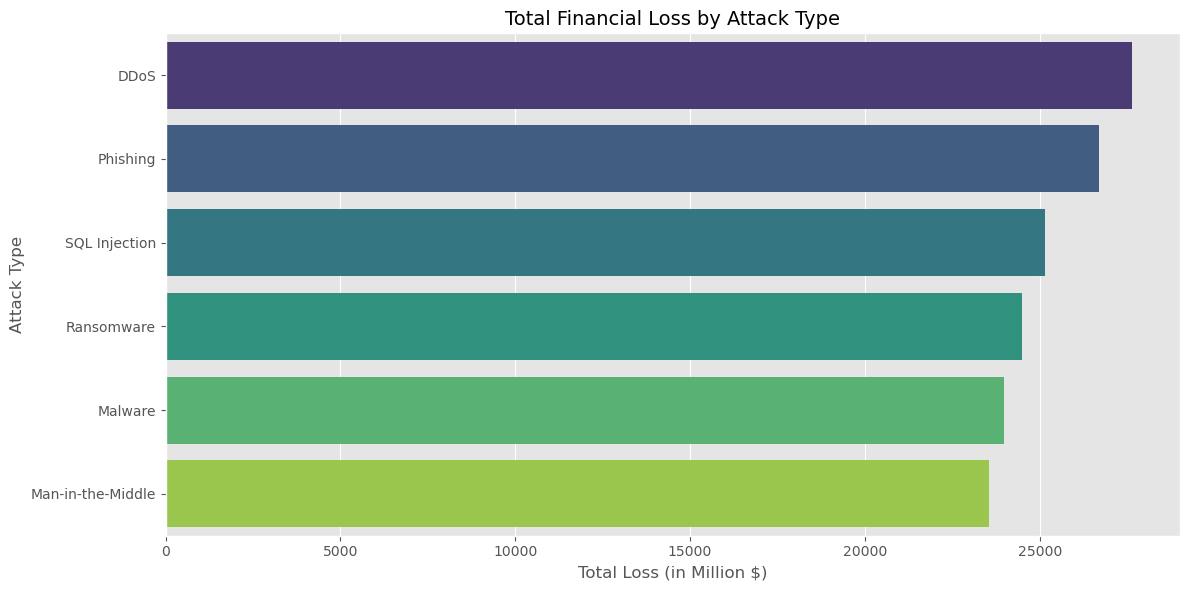

In [125]:
plt.figure(figsize=(12, 6))
sns.barplot(x=total_loss.values, y=total_loss.index, palette="viridis")
plt.title("Total Financial Loss by Attack Type", fontsize=14)
plt.xlabel("Total Loss (in Million $)", fontsize=12)
plt.ylabel("Attack Type", fontsize=12)
plt.tight_layout()
plt.show()

In [126]:
# Defence Used Analysis

### Most Common Defense Mechanisms

In [127]:
defense_counts = df['Defense Mechanism Used'].value_counts()
print("1. Most Common Defense Mechanisms:\n", defense_counts, "\n")

1. Most Common Defense Mechanisms:
 Defense Mechanism Used
Antivirus             628
VPN                   612
Encryption            592
Firewall              585
AI-based Detection    583
Name: count, dtype: int64 



###  Avg Financial Loss per Defense

In [128]:
avg_loss_per_defense = df.groupby('Defense Mechanism Used')['Financial Loss (in Million $)'].mean()
print("2. Avg Financial Loss per Defense:\n", avg_loss_per_defense, "\n")

2. Avg Financial Loss per Defense:
 Defense Mechanism Used
AI-based Detection    50.361527
Antivirus             51.698838
Encryption            50.400203
Firewall              49.719709
VPN                   50.209673
Name: Financial Loss (in Million $), dtype: float64 



### Avg Affected Users per Defense 

In [129]:
avg_users_per_defense = df.groupby('Defense Mechanism Used')['Number of Affected Users'].mean()
print("3. Avg Affected Users per Defense:\n", avg_users_per_defense, "\n")

3. Avg Affected Users per Defense:
 Defense Mechanism Used
AI-based Detection    505632.732419
Antivirus             509895.251592
Encryption            490803.555743
Firewall              518014.468376
VPN                   499117.874183
Name: Number of Affected Users, dtype: float64 



### Avg Resolution Time per Defense

In [130]:
avg_resolution_time = df.groupby('Defense Mechanism Used')['Incident Resolution Time (in Hours)'].mean()
print("4. Avg Resolution Time per Defense:\n", avg_resolution_time, "\n")

4. Avg Resolution Time per Defense:
 Defense Mechanism Used
AI-based Detection    36.612350
Antivirus             36.573248
Encryption            36.589527
Firewall              35.714530
VPN                   36.864379
Name: Incident Resolution Time (in Hours), dtype: float64 



### Top 3 Defenses per Attack Type

In [131]:
top_defenses_by_attack = (
    df.groupby(['Attack Type', 'Defense Mechanism Used'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Attack Type', 'Count'], ascending=[True, False])
)
top3_defenses_by_attack = top_defenses_by_attack.groupby('Attack Type').head(3)
print("5. Top 3 Defenses per Attack Type:\n", top3_defenses_by_attack, "\n")

5. Top 3 Defenses per Attack Type:
           Attack Type Defense Mechanism Used  Count
4                DDoS                    VPN    120
0                DDoS     AI-based Detection    113
1                DDoS              Antivirus    103
6             Malware              Antivirus    111
5             Malware     AI-based Detection    102
8             Malware               Firewall     99
13  Man-in-the-Middle               Firewall    106
12  Man-in-the-Middle             Encryption     95
11  Man-in-the-Middle              Antivirus     87
17           Phishing             Encryption    121
19           Phishing                    VPN    112
16           Phishing              Antivirus    111
24         Ransomware                    VPN    104
21         Ransomware              Antivirus    103
23         Ransomware               Firewall     98
26      SQL Injection              Antivirus    113
27      SQL Injection             Encryption    107
29      SQL Injection       

### Defense Usage by Country 

In [132]:
defense_by_country = df.groupby(['Country', 'Defense Mechanism Used']).size().unstack(fill_value=0)
print("6. Defense Usage by Country:\n", defense_by_country, "\n")

6. Defense Usage by Country:
 Defense Mechanism Used  AI-based Detection  Antivirus  Encryption  Firewall  \
Country                                                                       
Australia                               50         79          50        61   
Brazil                                  64         55          82        61   
China                                   49         64          48        63   
France                                  59         65          61        57   
Germany                                 67         63          63        40   
India                                   63         64          51        59   
Japan                                   63         56          58        60   
Russia                                  58         55          60        59   
UK                                      55         68          62        70   
USA                                     55         59          57        55   

Defense Mechanism Use

### IT vs Non-IT Industry Defense Usage

In [133]:
df['Is_IT_Industry'] = df[
'Target Industry'].apply(lambda x: 'IT' if x.strip().upper() == 'IT' else 'Non-IT')
defense_by_sector = df.groupby(['Is_IT_Industry', 'Defense Mechanism Used']).size().unstack(fill_value=0)
print("7. Defense Usage: IT vs Non-IT Industries:\n", defense_by_sector, "\n")

7. Defense Usage: IT vs Non-IT Industries:
 Defense Mechanism Used  AI-based Detection  Antivirus  Encryption  Firewall  \
Is_IT_Industry                                                                
IT                                     101         90         117        81   
Non-IT                                 482        538         475       504   

Defense Mechanism Used  VPN  
Is_IT_Industry               
IT                       89  
Non-IT                  523   



### Most Effective Defense Mechanism (by Lowest Avg Loss)

In [134]:
most_effective = avg_loss_per_defense.idxmin()
print(f"8. Most Effective Defense (Least Avg Loss): {most_effective} with ${avg_loss_per_defense[most_effective]:.2f}M\n")


8. Most Effective Defense (Least Avg Loss): Firewall with $49.72M



### Heatmap of Metrics Grouped by Defense 

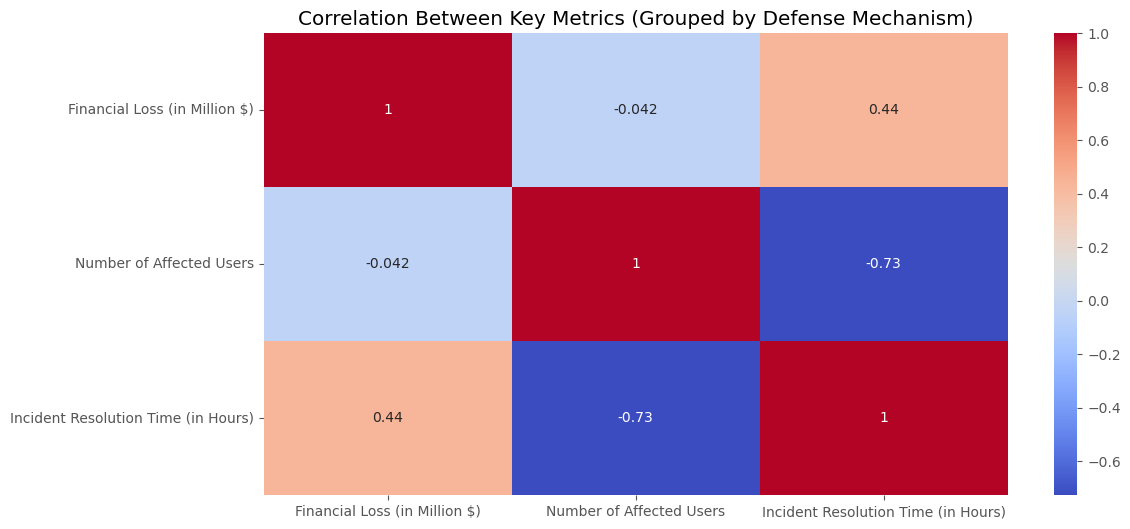

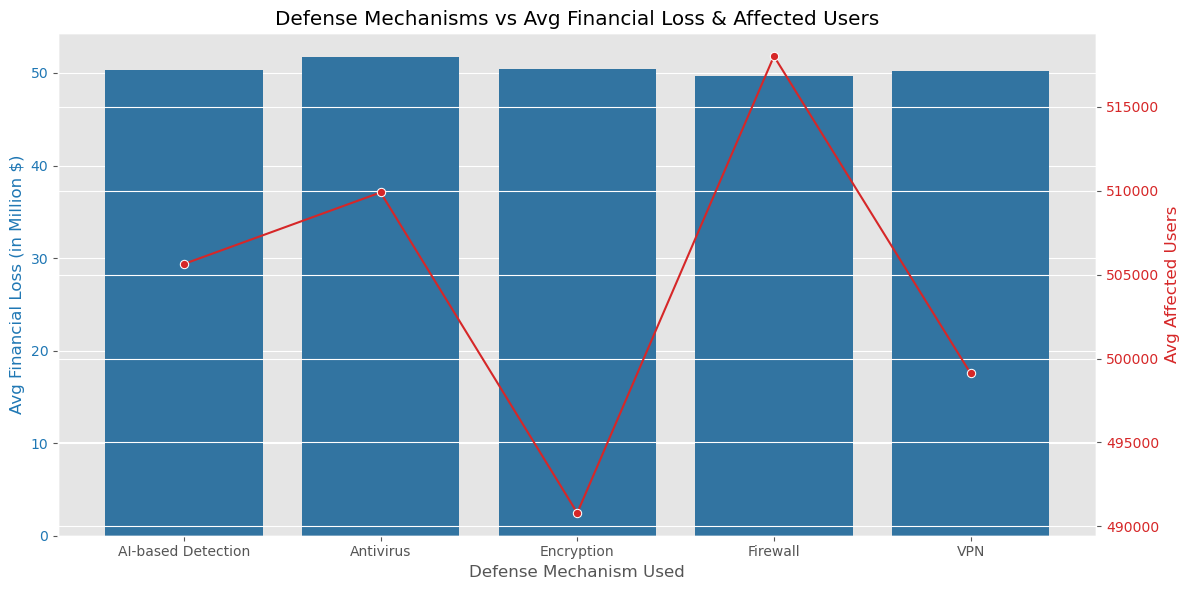

In [135]:
metrics_by_defense = df.groupby('Defense Mechanism Used')[[
    'Financial Loss (in Million $)',
    'Number of Affected Users',
    'Incident Resolution Time (in Hours)'
]].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(metrics_by_defense.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Key Metrics (Grouped by Defense Mechanism)")
plt.show()

# ------------------ 10. Graph: Avg Financial Loss vs Affected Users ------------------
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Defense Mechanism Used')
ax1.set_ylabel('Avg Financial Loss (in Million $)', color=color)
sns.barplot(x=avg_loss_per_defense.index, y=avg_loss_per_defense.values, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Defense Mechanisms vs Avg Financial Loss & Affected Users')

# Twin axis for affected users
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Affected Users', color=color)
sns.lineplot(x=avg_users_per_defense.index, y=avg_users_per_defense.values, ax=ax2, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
plt.show()